<a href="https://colab.research.google.com/github/mirrorball108/trial/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 511705088 bytes (631186606 bytes left) ...
 99% 1.05G/1.06G [00:04<00:00, 51.2MB/s]
100% 1.06G/1.06G [00:06<00:00, 101MB/s] 


In [7]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [20]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
#normalization
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

    train_ds=train_ds.map(process)
    validation_ds=validation_ds.map(process)

In [24]:
#create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))





In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.1027 - accuracy: 0.6139 - val_loss: 5.3781 - val_accuracy: 0.5128
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5766 - accuracy: 0.7041 - val_loss: 0.6555 - val_accuracy: 0.6618
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4957 - accuracy: 0.7594 - val_loss: 0.5483 - val_accuracy: 0.7350
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4404 - accuracy: 0.7964 - val_loss: 0.5198 - val_accuracy: 0.7628
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3881 - accuracy: 0.8248 - val_loss: 0.4826 - val_accuracy: 0.8002
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3298 - accuracy: 0.8561 - val_loss: 0.4887 - val_accuracy: 0.7912
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2621 - accuracy: 0.8863 - val_loss: 0.5235 - val_ac

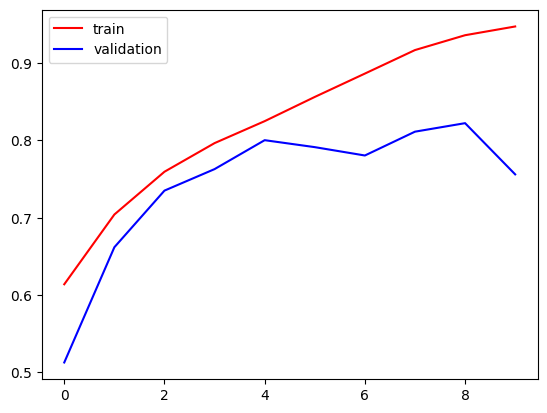

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

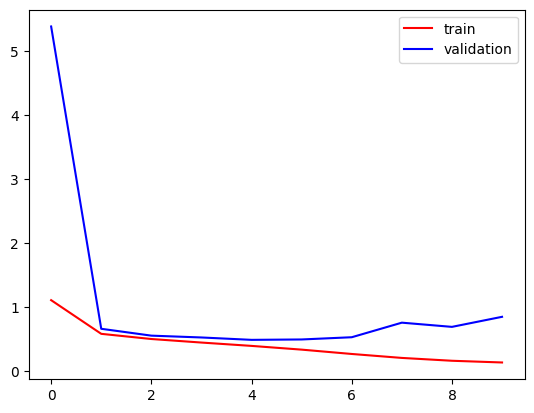

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()



this indicates overfitting of data

ways to reduce overfitting:
1.add more data
2.data augmentation
3.L1/L2 regularizer
4.Dropout
5.Batch Norm
6.Reduce complexity

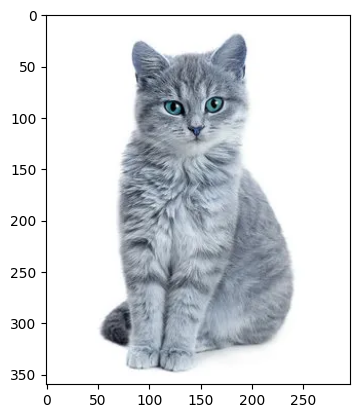

In [30]:
import cv2
test_image=cv2.imread('/content/cat.webp')
plt.imshow(test_image)

In [31]:
test_image.shape

(360, 296, 3)

In [32]:
test_image=cv2.resize(test_image,(256,256))

In [33]:
test_input=test_image.reshape((1,256,256,3))


In [34]:
model.predict(test_input)

1/1 [==============================] - 0s 422ms/step


array([[0.00076967]], dtype=float32)